In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("download.csv")

In [13]:
(df['motor_vehicle'].isnull() == False).sum()

35

## Forfeiture by Location

In [17]:
df['court_name'].value_counts()

BMC Dorchester      1838
BMC Central         1676
BMC Roxbury         1573
BMC West Roxbury    1241
Superior Court       593
BMC East Boston      512
BMC Brighton         192
BMC Charlestown      121
Name: court_name, dtype: int64

In [36]:
courts = pd.DataFrame(df.groupby('court_name')['amount'].sum())

In [37]:
courts

,amount
court_name,
BMC Brighton,47117.96
BMC Central,252091.32
BMC Charlestown,23378.00
BMC Dorchester,466529.01
BMC East Boston,132263.56
BMC Roxbury,371343.98
BMC West Roxbury,334065.90
Superior Court,3237620.37


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'BMC Brighton'),
  Text(1, 0, 'BMC Central'),
  Text(2, 0, 'BMC Charlestown'),
  Text(3, 0, 'BMC Dorchester'),
  Text(4, 0, 'BMC East Boston'),
  Text(5, 0, 'BMC Roxbury'),
  Text(6, 0, 'BMC West Roxbury'),
  Text(7, 0, 'Superior Court')])

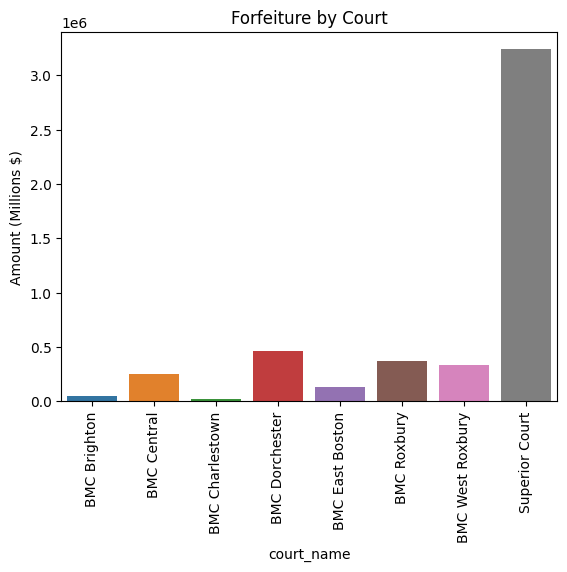

In [52]:
sns.barplot(data=courts, x=courts.index, y='amount')
plt.title("Forfeiture by Court")
plt.ylabel("Amount (Millions $)")
plt.xticks(rotation=90)

## Stats by location

In [66]:
means = pd.DataFrame(df.groupby('court_name')['amount'].agg('mean'))

In [70]:
means = means.drop('Superior Court', axis=0)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'BMC Brighton'),
  Text(1, 0, 'BMC Central'),
  Text(2, 0, 'BMC Charlestown'),
  Text(3, 0, 'BMC Dorchester'),
  Text(4, 0, 'BMC East Boston'),
  Text(5, 0, 'BMC Roxbury'),
  Text(6, 0, 'BMC West Roxbury')])

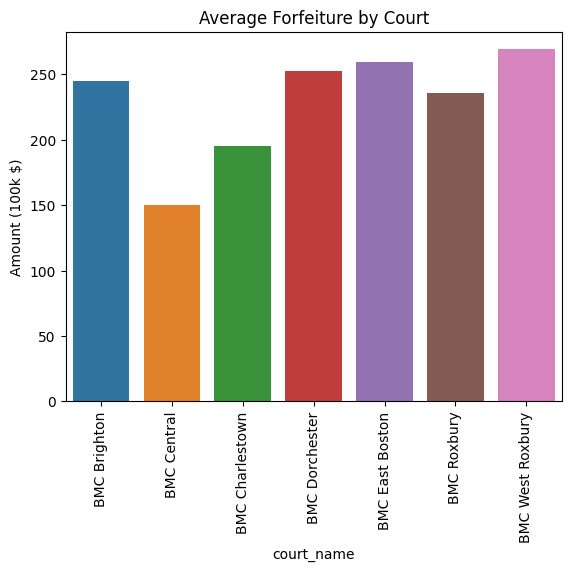

In [78]:
sns.barplot(data=means, x=means.index, y='amount')
plt.title("Average Forfeiture by Court")
plt.ylabel("Amount (100k $)")
plt.xticks(rotation=90)

In [73]:
medians = pd.DataFrame(df.groupby('court_name')['amount'].agg('median'))

In [76]:
medians = medians.drop('Superior Court', axis=0)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'BMC Brighton'),
  Text(1, 0, 'BMC Central'),
  Text(2, 0, 'BMC Charlestown'),
  Text(3, 0, 'BMC Dorchester'),
  Text(4, 0, 'BMC East Boston'),
  Text(5, 0, 'BMC Roxbury'),
  Text(6, 0, 'BMC West Roxbury')])

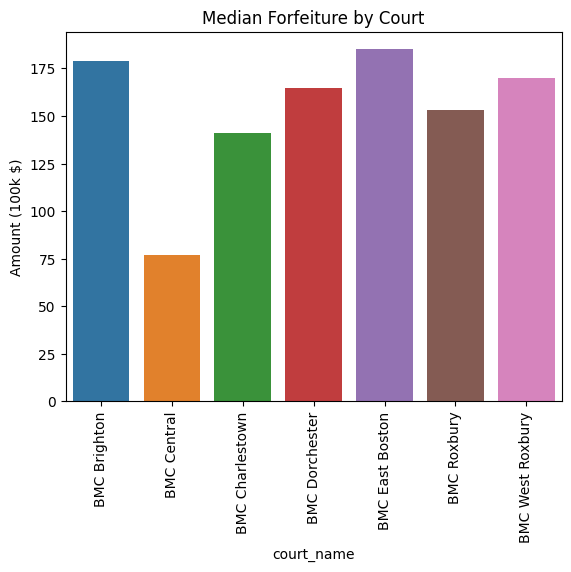

In [79]:
sns.barplot(data=medians, x=medians.index, y='amount')
plt.title("Median Forfeiture by Court")
plt.ylabel("Amount (100k $)")
plt.xticks(rotation=90)

In [91]:
dor = df.loc[df['court_name'] == "BMC Dorchester"]
dortotal = dor.groupby(dor.date.dt.year)['amount'].describe()
dortotal['total'] = dor.groupby(dor.date.dt.year)['amount'].sum()

/var/folders/5h/sd5p8v954b583kx5qv18z_hw0000gn/T/ipykernel_14811/1846466671.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=dortotal.index, y=dortotal['total'], palette='pastel')


Text(0, 0.5, 'Amount $')

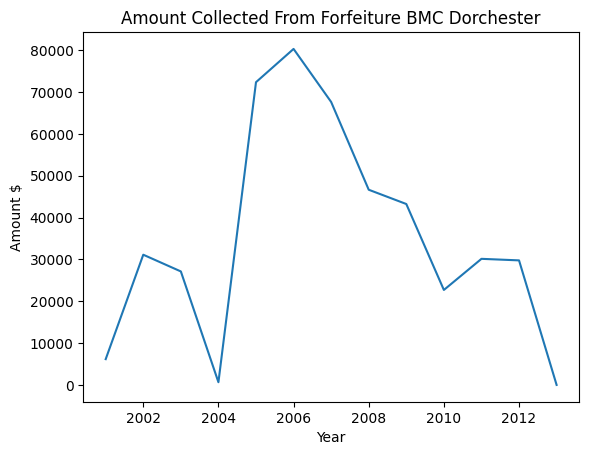

In [94]:
sns.lineplot(x=dortotal.index, y=dortotal['total'], palette='pastel')
plt.title("Amount Collected From Forfeiture BMC Dorchester")
plt.xlabel("Year")
plt.ylabel("Amount $")

In [92]:
sc = df.loc[df['court_name'] == "Superior Court"]
sctotal = sc.groupby(sc.date.dt.year)['amount'].describe()
sctotal['total'] = sc.groupby(sc.date.dt.year)['amount'].sum()

/var/folders/5h/sd5p8v954b583kx5qv18z_hw0000gn/T/ipykernel_14811/1909008930.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=sctotal.index, y=sctotal['total'], palette='pastel')


Text(0, 0.5, 'Amount (Millions $)')

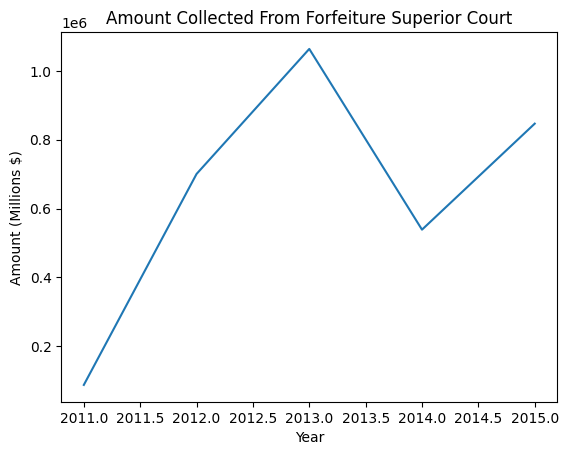

In [90]:
sns.lineplot(x=sctotal.index, y=sctotal['total'], palette='pastel')
plt.title("Amount Collected From Forfeiture Superior Court")
plt.xlabel("Year")
plt.ylabel("Amount (Millions $)")